# **$$Part-A$$**

### Ques-1

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self,
                 input_channels=3,
                 num_classes=10,
                 conv_filters=[32, 64, 128, 256, 512],
                 kernel_sizes=[3, 3, 3, 3, 3],
                 activation_fn=nn.ReLU,
                 dense_neurons=256):
        super(CNN, self).__init__()

        self.conv_layers = nn.ModuleList()
        in_channels = input_channels

        # 5 conv-activation-pool blocks
        for i in range(5):
            self.conv_layers.append(nn.Sequential(
                nn.Conv2d(in_channels, conv_filters[i], kernel_size=kernel_sizes[i], padding=1),
                activation_fn(),
                nn.MaxPool2d(kernel_size=2, stride=2)
            ))
            in_channels = conv_filters[i]

        # Dummy input to compute flatten size
        self.flatten_dim = self._get_flatten_size()

        self.fc1 = nn.Linear(self.flatten_dim, dense_neurons)
        self.fc_out = nn.Linear(dense_neurons, num_classes)

    def _get_flatten_size(self):
        x = torch.zeros((1, 3, 128, 128))  # Assuming 128x128 images
        for layer in self.conv_layers:
            x = layer(x)
        return x.view(1, -1).shape[1]

    def forward(self, x):
        for layer in self.conv_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc_out(x)
        return x

In [3]:
model = CNN(
    conv_filters=[16, 32, 64, 128, 256],
    kernel_sizes=[3, 3, 3, 3, 3],
    activation_fn=nn.ReLU,
    dense_neurons=128
)

print(model)

CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPo

In [4]:
pip install ptflops torchinfo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ptflops import get_model_complexity_info
from torchinfo import summary
import torch
import torch.nn as nn
import torch.nn.functional as F

# Your model class from before
class CNN(nn.Module):
    def __init__(self,
                 input_channels=3,
                 num_classes=10,
                 conv_filters=[32, 64, 128, 256, 512],
                 kernel_sizes=[3, 3, 3, 3, 3],
                 activation_fn=nn.ReLU,
                 dense_neurons=256):
        super(CNN, self).__init__()

        self.conv_layers = nn.ModuleList()
        in_channels = input_channels

        for i in range(5):
            self.conv_layers.append(nn.Sequential(
                nn.Conv2d(in_channels, conv_filters[i], kernel_size=kernel_sizes[i], padding=1),
                activation_fn(),
                nn.MaxPool2d(kernel_size=2, stride=2)
            ))
            in_channels = conv_filters[i]

        self.flatten_dim = self._get_flatten_size()
        self.fc1 = nn.Linear(self.flatten_dim, dense_neurons)
        self.fc_out = nn.Linear(dense_neurons, num_classes)

    def _get_flatten_size(self):
        x = torch.zeros((1, 3, 128, 128))  # Assuming 128x128 input
        for layer in self.conv_layers:
            x = layer(x)
        return x.view(1, -1).shape[1]

    def forward(self, x):
        for layer in self.conv_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc_out(x)
        return x


# Initialize the model
model = CNN()

# Show model summary with parameter count
summary(model, input_size=(1, 3, 128, 128))

# Show MACs and parameter count using ptflops
with torch.cuda.device(0):  # Use CPU if no GPU
    macs, params = get_model_complexity_info(model, (3, 128, 128), as_strings=True,
                                             print_per_layer_stat=True, verbose=True)
    print(f"\nTotal MACs(Total Computations): {macs}")
    print(f"Total Parameters: {params}")

CNN(
  3.67 M, 100.000% Params, 321.29 MMac, 99.372% MACs, 
  (conv_layers): ModuleList(
    (0): Sequential(
      896, 0.024% Params, 15.73 MMac, 4.865% MACs, 
      (0): Conv2d(896, 0.024% Params, 14.68 MMac, 4.540% MACs, 3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(0, 0.000% Params, 524.29 KMac, 0.162% MACs, )
      (2): MaxPool2d(0, 0.000% Params, 524.29 KMac, 0.162% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      18.5 k, 0.504% Params, 76.28 MMac, 23.594% MACs, 
      (0): Conv2d(18.5 k, 0.504% Params, 75.76 MMac, 23.431% MACs, 32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(0, 0.000% Params, 262.14 KMac, 0.081% MACs, )
      (2): MaxPool2d(0, 0.000% Params, 262.14 KMac, 0.081% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      73.86 k, 2.013% Params, 75.89 MMac, 23.472% MACs, 
      (0): Conv2d(73.86 k, 2.013% Params

### Ques-2

In [1]:
import wandb
wandb.login(key="fb4c8007ed0d1fb692b2279b11bb69081f2c698d")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ma23c014 (ma23c014-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
# Step 1:Imports and Dataset Paths
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

# Dataset path
train_dir = "/kaggle/input/dataset/inaturalist_12K/train"

# Step 2: Data Transforms
def get_transforms(data_augmentation):
    if data_augmentation:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

# Step 3: Model Definition
class CNNModel(nn.Module):
    def __init__(self, num_classes, num_filters=32, activation_fn=nn.ReLU,
                 dropout_rate=0.2, batch_norm=True, filter_organization="double"):
        super(CNNModel, self).__init__()

        if filter_organization == "same":
            filters = [num_filters, num_filters]
        elif filter_organization == "half":
            filters = [num_filters, num_filters // 2]
        else:
            filters = [num_filters, num_filters * 2]

        layers = [
            nn.Conv2d(3, filters[0], kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2),
            activation_fn()
        ]
        if batch_norm:
            layers.append(nn.BatchNorm2d(filters[0]))

        layers += [
            nn.Conv2d(filters[0], filters[1], kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2),
            activation_fn()
        ]
        if batch_norm:
            layers.append(nn.BatchNorm2d(filters[1]))

        self.conv = nn.Sequential(*layers, nn.AdaptiveAvgPool2d((1, 1)))
        self.fc = nn.Sequential(
            nn.Linear(filters[1], 256),
            activation_fn(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# Step 4: WandB Login
wandb.login()

# Step 5: Sweep Config
sweep_config = {
    "name": "Convolutional_NN", 
    "method": "random",
    "parameters": {
        "num_filters": {"values": [32, 64]},
        "activation_fn": {"values": ["ReLU", "GELU", "SiLU", "Mish"]},
        "dropout_rate": {"values": [0.2, 0.3]},
        "batch_norm": {"values": [True, False]},
        "data_augmentation": {"values": [True, False]},
        "filter_organization": {"values": ["same", "double", "half"]}
    }
}
sweep_id = wandb.sweep(sweep_config, project="Convolutional_NN")

# Step 6: Name Runs
def set_run_name(filters, org, augment, dropout, bn, act):
    return f"{filters}F-{org}-Aug:{augment}-Drop:{dropout}-BN:{bn}-Act:{act}"

# Step 7: Train Function
def train_model(config=None):
    with wandb.init(config=config):
        config = wandb.config
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Set a run name
        wandb.run.name = (
            f"filter_{config.num_filters}"
            f"_org{config.filter_organization}"
            f"_aug{config.data_augmentation}"
            f"_drop{config.dropout_rate}"
            f"_bn{config.batch_norm}"
            f"_act{config.activation_fn}"
        )

        # Activation function mapping
        activation_map = {
            "ReLU": nn.ReLU,
            "GELU": nn.GELU,
            "SiLU": nn.SiLU,
            "Mish": nn.Mish
        }
        activation_fn = activation_map[config.activation_fn]

        # Data loading
        transform = get_transforms(config.data_augmentation)
        full_dataset = datasets.ImageFolder(train_dir, transform=transform)

        train_idx, val_idx = train_test_split(
            range(len(full_dataset.targets)),
            test_size=0.2,
            stratify=full_dataset.targets,
            random_state=42
        )

        train_subset = Subset(full_dataset, train_idx)
        val_subset = Subset(full_dataset, val_idx)

        train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

        model = CNNModel(
            num_classes=len(full_dataset.classes),
            num_filters=config.num_filters,
            activation_fn=activation_fn,
            dropout_rate=config.dropout_rate,
            batch_norm=config.batch_norm,
            filter_organization=config.filter_organization
        ).to(device)

        wandb.watch(model, log="all", log_freq=100)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        best_val_acc = 0

        for epoch in range(10):
            model.train()
            train_loss, train_correct = 0, 0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                train_correct += (outputs.argmax(1) == labels).sum().item()

            train_loss /= len(train_loader)
            train_acc = train_correct / len(train_loader.dataset)

            model.eval()
            val_loss, val_correct = 0, 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    val_correct += (outputs.argmax(1) == labels).sum().item()

            val_loss /= len(val_loader)
            val_acc = val_correct / len(val_loader.dataset)

            wandb.log({
                "epoch": epoch,
                "train_loss": train_loss,
                "train_accuracy": train_acc,
                "val_loss": val_loss,
                "val_accuracy": val_acc
            }, step=epoch)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                model_path = os.path.join(wandb.run.dir, "best_model.pth")
                torch.save(model.state_dict(), model_path)
                wandb.save(model_path)

# Step 8: Run Sweep
wandb.agent(sweep_id, function=train_model, count=25)

Create sweep with ID: sfpjz5wn
Sweep URL: https://wandb.ai/ma23c014-indian-institute-of-technology-madras/Convolutional_NN/sweeps/sfpjz5wn


wandb: Agent Starting Run: 74ng6y5z with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 32
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: WARNING Saving files without folders. If you want to preserve subdirectories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▆▇▇▇▇█
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▁▃▅▅▅▅▇▆█
val_loss,█▇▆▄▃▃▃▃▃▁
epoch,9
train_accuracy,0.28866
train_loss,1.99004
val_accuracy,0.2945
val_loss,1.98182


wandb: Agent Starting Run: 85dqhb15 with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▆▇▇▇██
train_loss,█▆▅▄▃▃▂▂▂▁
val_accuracy,▁▂▅▅▅▇▆▇██
val_loss,█▆▄▄▄▂▂▂▁▂
epoch,9
train_accuracy,0.30479
train_loss,1.93459
val_accuracy,0.333
val_loss,1.93805


wandb: Agent Starting Run: 0xx6dvn3 with config:
wandb: 	activation_fn: ReLU
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: double
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▆▇▇██
train_loss,█▆▅▄▄▃▂▂▂▁
val_accuracy,▁▂▄▅▅▆▅▆▇█
val_loss,█▆▅▄▄▃▃▂▂▁
epoch,9
train_accuracy,0.33279
train_loss,1.87765
val_accuracy,0.359
val_loss,1.85375


wandb: Agent Starting Run: qm7bze6n with config:
wandb: 	activation_fn: SiLU
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▆▆▇▇▇█
train_loss,█▆▄▄▃▃▂▂▂▁
val_accuracy,▁▁▃▇▅▇▆▆██
val_loss,█▇▅▄▄▄▃▃▂▁
epoch,9
train_accuracy,0.30754
train_loss,1.94867
val_accuracy,0.312
val_loss,1.9423


wandb: Agent Starting Run: b515ji91 with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▆▆▇▇▇█
train_loss,█▅▄▄▃▂▂▂▁▁
val_accuracy,▁▃▄▅▅▇▅▆▇█
val_loss,█▆▅▄▄▃▃▃▁▁
epoch,9
train_accuracy,0.31166
train_loss,1.93529
val_accuracy,0.329
val_loss,1.92247


wandb: Agent Starting Run: z2s76ynz with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▅▆▇▇█
train_loss,█▆▅▄▃▃▂▂▂▁
val_accuracy,▁▂▃▄▅▆▇▇▇█
val_loss,█▇▅▅▄▄▃▂▂▁
epoch,9
train_accuracy,0.31416
train_loss,1.94166
val_accuracy,0.3225
val_loss,1.92318


wandb: Agent Starting Run: qtrqdovx with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▆▆▇▇▇███
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▄▆▆▅▇█▇█
val_loss,█▆▅▄▃▃▂▂▁▁
epoch,9
train_accuracy,0.28379
train_loss,1.99054
val_accuracy,0.2955
val_loss,1.98478


wandb: Agent Starting Run: hfm3cuvq with config:
wandb: 	activation_fn: SiLU
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: same
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▆▆▇███
train_loss,█▆▅▄▃▂▂▂▁▁
val_accuracy,▁▁▄▄▄▄▆▇█▅
val_loss,█▆▄▄▄▄▃▂▁▂
epoch,9
train_accuracy,0.30366
train_loss,1.93993
val_accuracy,0.3035
val_loss,1.95792


wandb: Agent Starting Run: os9opuqh with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: half
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▄▅▅▆█▆▇█
val_loss,█▆▄▄▄▂▂▂▁▁
epoch,9
train_accuracy,0.28566
train_loss,1.99014
val_accuracy,0.2935
val_loss,1.98888


wandb: Agent Starting Run: ozddbdj5 with config:
wandb: 	activation_fn: ReLU
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▆▇▇▇▇█
train_loss,█▆▅▄▃▃▃▂▁▁
val_accuracy,▁▁▃▄▃▅▄███
val_loss,█▇▅▄▄▂▃▁▁▁
epoch,9
train_accuracy,0.30941
train_loss,1.93993
val_accuracy,0.321
val_loss,1.94522


wandb: Agent Starting Run: nehclbqt with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▆▇▇▇▇█
train_loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▁▂▅▆▆▆██▇
val_loss,█▇▅▅▃▃▃▂▂▁
epoch,9
train_accuracy,0.30741
train_loss,1.94623
val_accuracy,0.304
val_loss,1.9389


wandb: Agent Starting Run: xtckq1bq with config:
wandb: 	activation_fn: ReLU
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: double
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▅▅▆▆▇▇██
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▂▄▆▄▆▆▇█▆
val_loss,█▆▅▄▃▂▂▂▁▂
epoch,9
train_accuracy,0.29066
train_loss,1.97833
val_accuracy,0.2835
val_loss,1.99718


wandb: Agent Starting Run: s59bxfc7 with config:
wandb: 	activation_fn: SiLU
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▅▆▇▇▇██
train_loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▅▅▆▆▇██▇█
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,9
train_accuracy,0.30366
train_loss,1.94533
val_accuracy,0.3065
val_loss,1.96069


wandb: Agent Starting Run: vo55ljdy with config:
wandb: 	activation_fn: ReLU
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: same
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▆▇▇▇█
train_loss,█▆▅▄▄▃▂▂▂▁
val_accuracy,▁▂▃▃▄▆▆▇█▇
val_loss,█▇▅▅▄▃▃▂▁▃
epoch,9
train_accuracy,0.32517
train_loss,1.90897
val_accuracy,0.323
val_loss,1.94221


wandb: Agent Starting Run: swqx9mai with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: same
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▃▅▅▅▇▇▇█
train_loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▂▃▄▅▇▅▇██
val_loss,█▇▆▅▄▃▄▂▂▁
epoch,9
train_accuracy,0.32042
train_loss,1.90826
val_accuracy,0.333
val_loss,1.89967


wandb: Agent Starting Run: 76mjnp0k with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: same
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▆▇▇███
train_loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▃▄▅▅▅▆▆▇█
val_loss,█▆▅▃▄▃▃▃▁▁
epoch,9
train_accuracy,0.30529
train_loss,1.94844
val_accuracy,0.329
val_loss,1.95363


wandb: Agent Starting Run: trj7a139 with config:
wandb: 	activation_fn: SiLU
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▄▅▆▇▇▇██
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▁▁▃▄▅▇█▇█
val_loss,█▆▅▄▄▄▃▁▃▁
epoch,9
train_accuracy,0.30541
train_loss,1.93828
val_accuracy,0.3195
val_loss,1.92054


wandb: Agent Starting Run: uvr7k6jy with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: same
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▆▇▇███
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▄▃▅▅▄▅▆█▇
val_loss,█▆▆▃▃▅▅▃▁▁
epoch,9
train_accuracy,0.29716
train_loss,1.95638
val_accuracy,0.3115
val_loss,1.94972


wandb: Agent Starting Run: fquould3 with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: True
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▆▆▇▇██
train_loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▅▄▅▆▅▇██▇
val_loss,█▅▅▄▂▅▁▁▁▂
epoch,9
train_accuracy,0.32054
train_loss,1.90282
val_accuracy,0.3255
val_loss,1.92437


wandb: Agent Starting Run: 39jdqip5 with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▅▆▆▇▇▇█
train_loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▃▅▄▄▅▅██▆
val_loss,█▆▅▅▄▃▃▂▁▁
epoch,9
train_accuracy,0.30379
train_loss,1.95923
val_accuracy,0.2985
val_loss,1.96072


wandb: Agent Starting Run: wnw6ckpu with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: False
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: same
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▄▄▃▆██▇██
val_loss,█▆▅▄▃▂▂▃▁▁
epoch,9
train_accuracy,0.30129
train_loss,1.95307
val_accuracy,0.306
val_loss,1.96526


wandb: Agent Starting Run: xz5w0jun with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: same
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▆▇▇██
train_loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▂▂▄▅▇▇▇█▇
val_loss,█▇▆▆▄▅▃▂▃▁
epoch,9
train_accuracy,0.31016
train_loss,1.94647
val_accuracy,0.3105
val_loss,1.92979


wandb: Agent Starting Run: uc5jn2ar with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: half
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▂▁▅▆▄▁▅▇█▆
val_loss,█▇▅▄▅▇▃▁▁▆
epoch,9
train_accuracy,0.29679
train_loss,1.96227
val_accuracy,0.2965
val_loss,2.02651


wandb: Agent Starting Run: b459l3xa with config:
wandb: 	activation_fn: Mish
wandb: 	batch_norm: False
wandb: 	data_augmentation: False
wandb: 	dropout_rate: 0.2
wandb: 	filter_organization: double
wandb: 	num_filters: 32


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▅▆▆▆▇▇█
train_loss,█▅▄▄▃▃▂▂▁▁
val_accuracy,▁▄▅▅▅▇▆▇▇█
val_loss,█▆▅▄▄▂▃▂▂▁
epoch,9
train_accuracy,0.30254
train_loss,1.9574
val_accuracy,0.303
val_loss,1.94787


wandb: Agent Starting Run: munxwul7 with config:
wandb: 	activation_fn: GELU
wandb: 	batch_norm: True
wandb: 	data_augmentation: True
wandb: 	dropout_rate: 0.3
wandb: 	filter_organization: half
wandb: 	num_filters: 64


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▃▄▅▅▆▆▇▇█
train_loss,█▆▅▄▃▃▂▂▂▁
val_accuracy,▁▃▂▄▄▆▅▇█▅
val_loss,█▆█▅▅▄▃▂▁▃
epoch,9
train_accuracy,0.31491
train_loss,1.92965
val_accuracy,0.297
val_loss,1.95759


### Ques-4

/tmp/ipykernel_31/3694459467.py:111: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_dir, "best_model.pth"), map_location=d

Test Accuracy: 0.3900


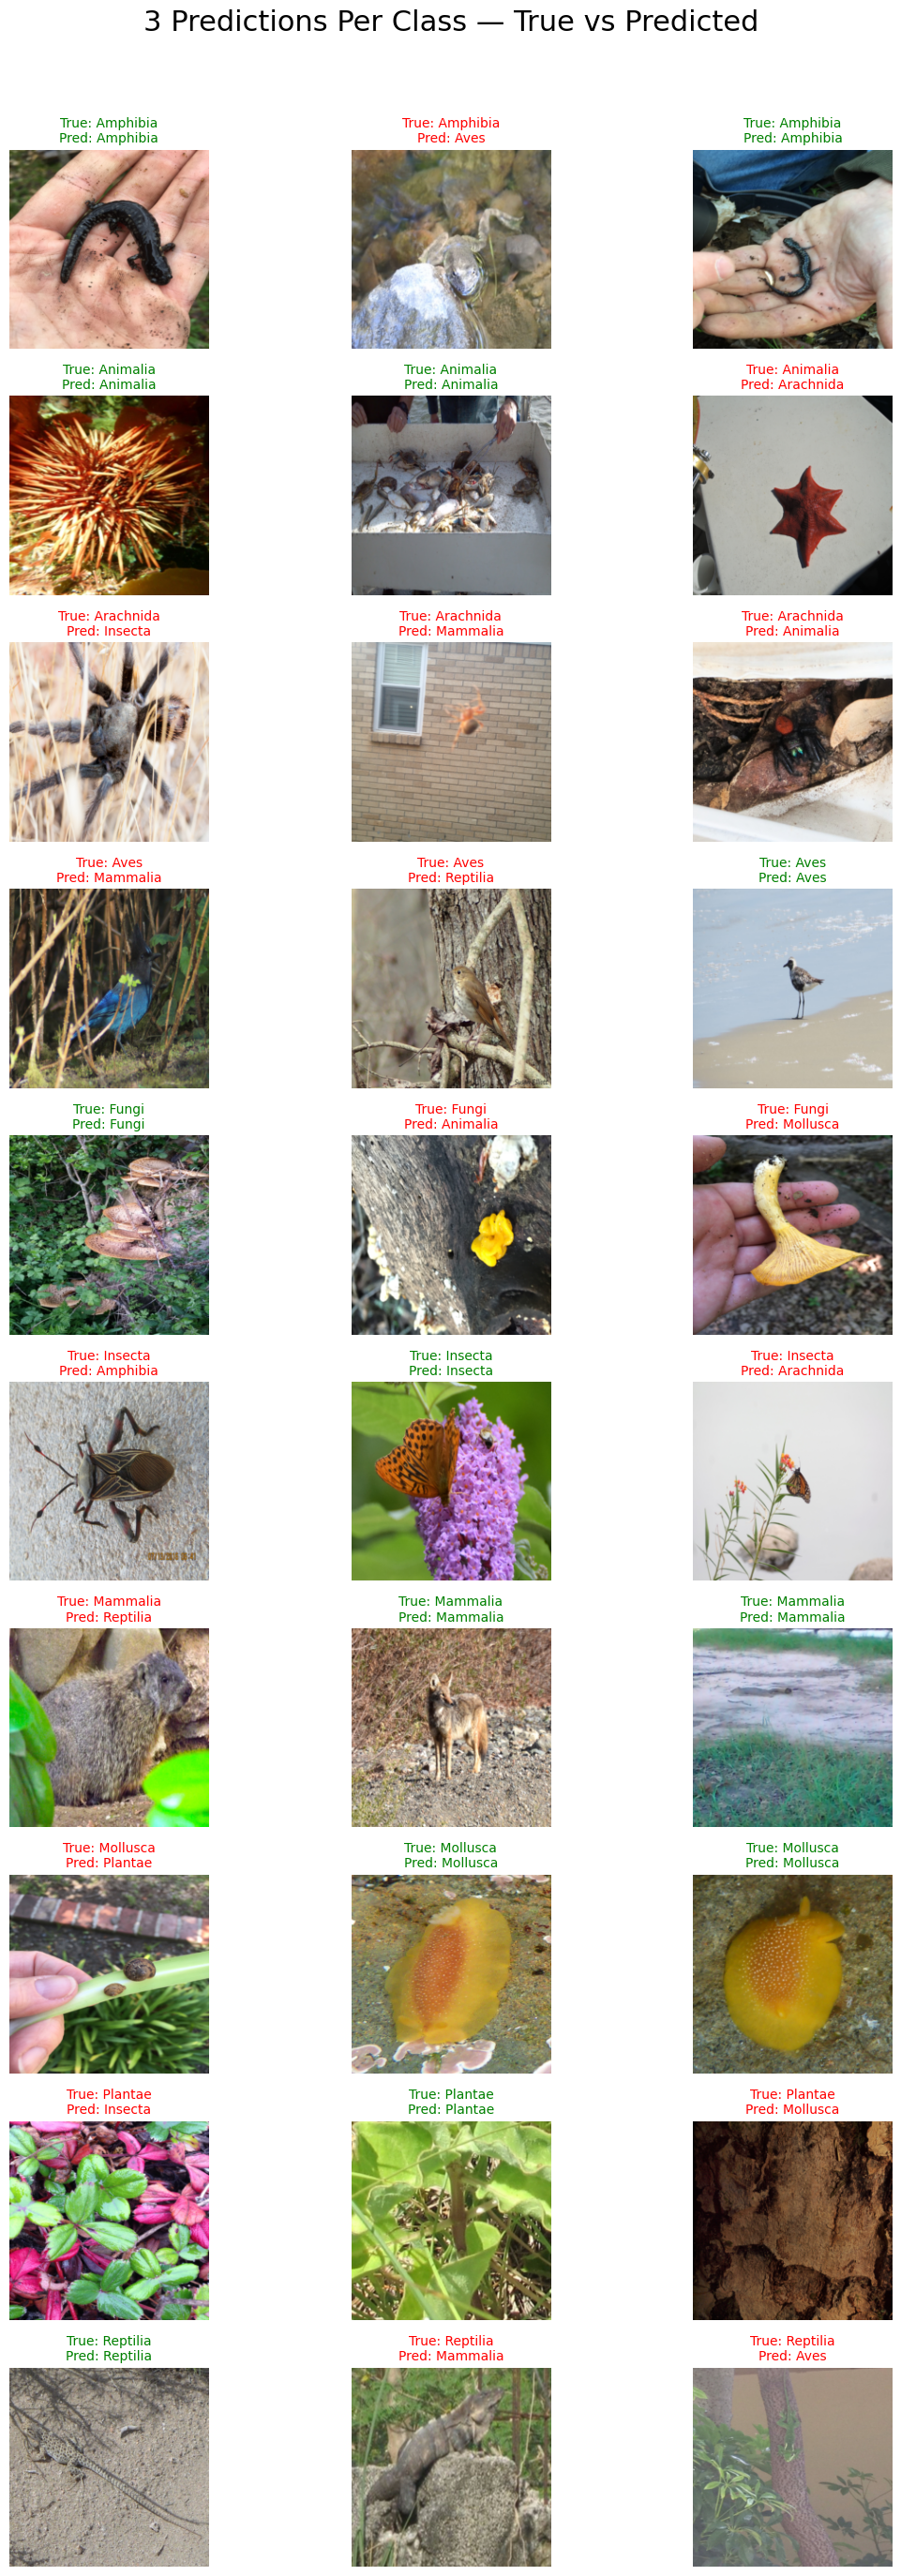

In [4]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# Load best config from saved sweep
best_config = {
    "filter_organization": "same",
    "num_filters": 64,
    "activation_fn": "Mish",                                     
    "dropout_rate": 0.3,                 
    "batch_norm": True,
    "data_augmentation":False
}

# Match activation string to nn.Module
activation_map = {
    "ReLU": nn.ReLU,
    "GELU": nn.GELU,
    "SiLU": nn.SiLU,
    "Mish": nn.Mish
}
activation_fn = activation_map[best_config["activation_fn"]]

# CNN Model Definition (same as training)
class CNNModel(nn.Module):
    def __init__(self, num_classes, num_filters=32, activation_fn=nn.ReLU,
                 dropout_rate=0.2, batch_norm=True, filter_organization="double"):
        super(CNNModel, self).__init__()

        if filter_organization == "same":
            filters = [num_filters, num_filters]
        elif filter_organization == "half":
            filters = [num_filters, num_filters // 2]
        else:
            filters = [num_filters, num_filters * 2]

        layers = [
            nn.Conv2d(3, filters[0], kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2),
            activation_fn()
        ]
        if batch_norm:
            layers.append(nn.BatchNorm2d(filters[0]))

        layers += [
            nn.Conv2d(filters[0], filters[1], kernel_size=3, padding=1),
            nn.MaxPool2d(2, 2),
            activation_fn()
        ]
        if batch_norm:
            layers.append(nn.BatchNorm2d(filters[1]))

        self.conv = nn.Sequential(*layers, nn.AdaptiveAvgPool2d((1, 1)))
        self.fc = nn.Sequential(
            nn.Linear(filters[1], 256),
            activation_fn(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(
    num_classes=10,
    num_filters=best_config["num_filters"],
    activation_fn=activation_fn,
    dropout_rate=best_config["dropout_rate"],
    batch_norm=best_config["batch_norm"],
    filter_organization=best_config["filter_organization"]
).to(device)

model.load_state_dict(torch.load("/kaggle/input/best_model/pytorch/default/1/best_model.pth", map_location=device))
model.eval()

# Load test/val dataset
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
test_dataset = datasets.ImageFolder("/kaggle/input/dataset/inaturalist_12K/val", transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Inference
correct, total = 0, 0
all_preds, all_labels, all_images = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu())

# Accuracy
test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Visualize 3 samples per class
class_names = test_dataset.classes
class_to_samples = {cls: [] for cls in range(10)}

for i, label in enumerate(all_labels):
    if len(class_to_samples[label]) < 3:
        class_to_samples[label].append(i)

selected_indices = [idx for indices in class_to_samples.values() for idx in indices]

plt.figure(figsize=(12, 12))
for i, idx in enumerate(selected_indices):
    image_tensor = all_images[idx]
    image_np = image_tensor.permute(1, 2, 0).numpy()
    image_np = (image_np * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406])  # unnormalize
    image_np = np.clip(image_np, 0, 1)

    true_label = class_names[all_labels[idx]]
    pred_label = class_names[all_preds[idx]]
    caption = f"True: {true_label}\nPred: {pred_label}"
    
    plt.subplot(10, 3, i + 1)
    plt.imshow(image_np)
    plt.title(caption, fontsize=8)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **$$PART-B$$**

### Ques-1

Training of given test data using pretrained model- ResNet50

In [1]:
import torch
import torchvision
from torchvision import models, transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

train_dataset = datasets.ImageFolder(root='/kaggle/input/dataset/inaturalist_12K/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/kaggle/input/dataset/inaturalist_12K/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [3]:
model = models.resnet50(pretrained=True)  # Load  ResNet50

num_features = model.fc.in_features  # Get input features of the FC layer
model.fc = nn.Linear(num_features, 10)  # Replace the FC layer

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():  # Enable training for the new FC layer
    param.requires_grad = True


criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)  # Optimizer for fine-tuning

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 203MB/s] 


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 1.7050880959239632
Epoch 2/10, Loss: 1.1714733319160657
Epoch 3/10, Loss: 1.0069013588344708
Epoch 4/10, Loss: 0.9263938585409341
Epoch 5/10, Loss: 0.8739984236395778
Epoch 6/10, Loss: 0.8422701121709598
Epoch 7/10, Loss: 0.8192606016088979
Epoch 8/10, Loss: 0.8006586754283966
Epoch 9/10, Loss: 0.7823247993335175
Epoch 10/10, Loss: 0.774880616333538


In [5]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total}%")

Validation Accuracy: 77.0%


In [6]:
torch.save(model.state_dict(), 'fine_tuned_resnet50.pth')

### Ques-2
I tried all the three given strategies

Strategy-1

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Step 1: Define Dataset Paths
train_dir = "/kaggle/input/dataset/inaturalist_12K/train" 
val_dir = "/kaggle/input/dataset/inaturalist_12K/val"  

# Step 2: Define Data Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Step 3: Load Datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Step 4: Load Pre-trained ResNet50
model = models.resnet50(weights="ResNet50_Weights.DEFAULT")

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace and unfreeze the fully connected layer
num_classes = 10  # Update with the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)
for param in model.fc.parameters():
    param.requires_grad = True

# Step 5: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

# Step 6: Define Training and Validation Loops
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        model.train()

        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total

        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Step 7: Train the Model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Step 8: Save the Model
save_path = "/kaggle/working/resnet50_finetuned_last_layer.pth"  # Saving in the working directory 
torch.save(model.state_dict(), save_path)
print(f"Model saved to Kaggle working directory as {save_path}")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 211MB/s]


Epoch 1/10
Train Loss: 1.9619, Val Loss: 1.6928, Val Accuracy: 67.95%
Epoch 2/10
Train Loss: 1.5121, Val Loss: 1.3581, Val Accuracy: 70.90%
Epoch 3/10
Train Loss: 1.2707, Val Loss: 1.1755, Val Accuracy: 74.15%
Epoch 4/10
Train Loss: 1.1311, Val Loss: 1.0709, Val Accuracy: 76.25%
Epoch 5/10
Train Loss: 1.0291, Val Loss: 0.9667, Val Accuracy: 77.35%
Epoch 6/10
Train Loss: 0.9499, Val Loss: 0.8997, Val Accuracy: 78.40%
Epoch 7/10
Train Loss: 0.8969, Val Loss: 0.8607, Val Accuracy: 78.65%
Epoch 8/10
Train Loss: 0.8509, Val Loss: 0.8248, Val Accuracy: 80.35%
Epoch 9/10
Train Loss: 0.8142, Val Loss: 0.7977, Val Accuracy: 79.85%
Epoch 10/10
Train Loss: 0.7881, Val Loss: 0.7387, Val Accuracy: 81.30%
Model saved to Kaggle working directory as /kaggle/working/resnet50_finetuned_last_layer.pth


Strategy -(ii)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Step 1: Define Dataset Paths
train_dir = "/kaggle/input/dataset/inaturalist_12K/train" 
val_dir = "/kaggle/input/dataset/inaturalist_12K/val"  

# Step 2: Define Data Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Step 3: Load Datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Step 4: Load Pre-trained ResNet50
model = models.resnet50(weights="ResNet50_Weights.DEFAULT")

# Step 5: Freeze All Layers Initially
for param in model.parameters():
    param.requires_grad = False

# Step 6: Unfreeze the First `k` Layers
k = 5  
layers = list(model.children())  
for i in range(k):
    for param in layers[i].parameters():
        param.requires_grad = True

# Replace the Fully Connected Layer
num_classes = 10  # Update with the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)
for param in model.fc.parameters():
    param.requires_grad = True

# Step 7: Define Loss Function and Optimizer
trainable_params = filter(lambda p: p.requires_grad, model.parameters())
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(trainable_params, lr=1e-4)

# Step 8: Define Training and Validation Loops
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        model.train()

        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total

        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Step 9: Train the Model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Step 10: Save the Model
save_path = "/kaggle/working/resnet50_finetuned_k_layers.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to Kaggle working directory as {save_path}")

Epoch 1/10
Train Loss: 1.9435, Val Loss: 1.6359, Val Accuracy: 61.90%
Epoch 2/10
Train Loss: 1.4609, Val Loss: 1.3138, Val Accuracy: 68.05%
Epoch 3/10
Train Loss: 1.2085, Val Loss: 1.1277, Val Accuracy: 72.75%
Epoch 4/10
Train Loss: 1.0392, Val Loss: 1.0036, Val Accuracy: 76.85%
Epoch 5/10
Train Loss: 0.9249, Val Loss: 0.9108, Val Accuracy: 77.60%
Epoch 6/10
Train Loss: 0.8341, Val Loss: 0.8373, Val Accuracy: 79.40%
Epoch 7/10
Train Loss: 0.7582, Val Loss: 0.7763, Val Accuracy: 80.20%
Epoch 8/10
Train Loss: 0.6980, Val Loss: 0.7340, Val Accuracy: 80.05%
Epoch 9/10
Train Loss: 0.6378, Val Loss: 0.6984, Val Accuracy: 80.90%
Epoch 10/10
Train Loss: 0.6011, Val Loss: 0.6796, Val Accuracy: 81.45%
Model saved to Kaggle working directory as /kaggle/working/resnet50_finetuned_k_layers.pth


Strategy-(iii)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Step 1: Define Dataset Paths
train_dir = "/kaggle/input/dataset/inaturalist_12K/train"  
val_dir = "/kaggle/input/dataset/inaturalist_12K/val"  

# Step 2: Define Data Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Step 3: Load Datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Step 4: Load Pre-trained ResNet50
model = models.resnet50(weights="ResNet50_Weights.DEFAULT")

# Step 5: Freeze the First `k` Layers
k = 5  # Specify the number of layers to freeze
layers = list(model.children())  # Extract all layers as a list
for i in range(k):
    for param in layers[i].parameters():
        param.requires_grad = False

# Unfreeze the Rest of the Layers
for i in range(k, len(layers)):
    for param in layers[i].parameters():
        param.requires_grad = True

# Replace the Fully Connected Layer
num_classes = 10  # Update with the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)
for param in model.fc.parameters():
    param.requires_grad = True

# Step 6: Define Loss Function and Optimizer
trainable_params = filter(lambda p: p.requires_grad, model.parameters())
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(trainable_params, lr=1e-4)

# Step 7: Define Training and Validation Loops
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        model.train()

        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total

        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Step 8: Train the Model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Step 9: Save the Model
save_path = "/kaggle/working/resnet50_finetuned_rest_layers.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to Kaggle working directory as {save_path}")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 212MB/s]


Epoch 1/10
Train Loss: 0.8994, Val Loss: 0.4745, Val Accuracy: 85.25%
Epoch 2/10
Train Loss: 0.2856, Val Loss: 0.4210, Val Accuracy: 86.70%
Epoch 3/10
Train Loss: 0.1200, Val Loss: 0.5038, Val Accuracy: 84.65%
Epoch 4/10
Train Loss: 0.0786, Val Loss: 0.5608, Val Accuracy: 85.00%
Epoch 5/10
Train Loss: 0.0602, Val Loss: 0.5821, Val Accuracy: 84.20%
Epoch 6/10
Train Loss: 0.0497, Val Loss: 0.5450, Val Accuracy: 85.30%
Epoch 7/10
Train Loss: 0.0463, Val Loss: 0.6203, Val Accuracy: 84.90%
Epoch 8/10
Train Loss: 0.0591, Val Loss: 0.6025, Val Accuracy: 84.05%
Epoch 9/10
Train Loss: 0.0442, Val Loss: 0.5908, Val Accuracy: 84.60%
Epoch 10/10
Train Loss: 0.0297, Val Loss: 0.6758, Val Accuracy: 83.85%
Model saved to Kaggle working directory as /kaggle/working/resnet50_finetuned_rest_layers.pth


# **$$Thank You$$**